In [1]:
from mpl_toolkits import mplot3d
from scipy.interpolate import CubicSpline
import scipy.io as scio
import numpy as np 
import matplotlib.pyplot as plt
data = scio.loadmat('tissue3_1.mat')

In [18]:
# Look at imported data
for key, value in data.items():
    print(key)

__header__
__version__
__globals__
x_c
IDX
spC
dermis
k
m
dye
infl
bcc
map_t3
map_t3_c
map_t3_svd
tissue_t3_1
ID


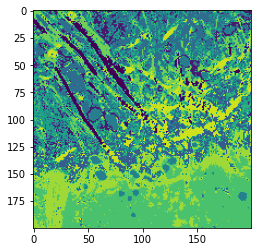

In [17]:
plt.imshow(data['IDX'])

In [6]:
t10  = data['map_t3']     # (200, 200, 1024)
section1 = t10[:,:,:340]
section2 = t10[:,:,340:680]
section3 = t10[:,:,680:1020]

In [9]:
# Construct data matrix
#   Each row: point in space
#   Each column: spectra
D1 = np.zeros((40000,340))
D2 = np.zeros((40000,340))
D3 = np.zeros((40000,340))

for i in range(200):
    for j in range(200):
        index = i*200 + j
        D1[index,:] = section1[i,j,:]
        D2[index,:] = section2[i,j,:]
        D3[index,:] = section3[i,j,:]

In [10]:
V1, W1, U1 = np.linalg.svd(D1)
V2, W2, U2 = np.linalg.svd(D2)
V3, W3, U3 = np.linalg.svd(D3)

print(U1.shape, W1.shape, V1.shape)
print(U2.shape, W2.shape, V2.shape)
print(U3.shape, W3.shape, V3.shape)

(340, 340) (340,) (40000, 40000)
(340, 340) (340,) (40000, 40000)
(340, 340) (340,) (40000, 40000)


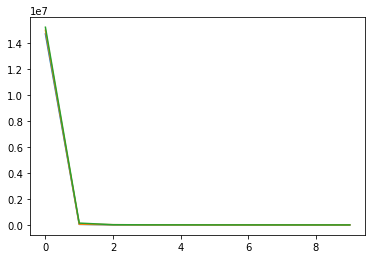

In [13]:
plt.plot(W1[0:10])
plt.plot(W2[0:10])
plt.plot(W3[0:10])

In [14]:
V10 = np.zeros((200,200))
V11 = np.zeros((200,200))
V12 = np.zeros((200,200))

V20 = np.zeros((200,200))
V21 = np.zeros((200,200))
V22 = np.zeros((200,200))

V30 = np.zeros((200,200))
V31 = np.zeros((200,200))
V32 = np.zeros((200,200))

for i in range(200):
    for j in range(200):
        index = i*200 + j
        
        V10[i,j] = V1[index,0]
        V11[i,j] = V1[index,1]
        V12[i,j] = V1[index,2]

        V20[i,j] = V2[index,0]
        V21[i,j] = V2[index,1]
        V22[i,j] = V2[index,2]
        
        V30[i,j] = V3[index,0]
        V31[i,j] = V3[index,1]
        V32[i,j] = V3[index,2]
        

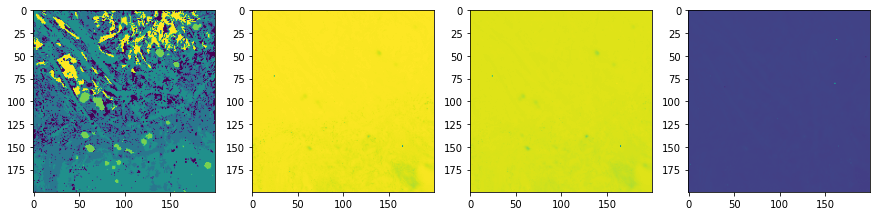

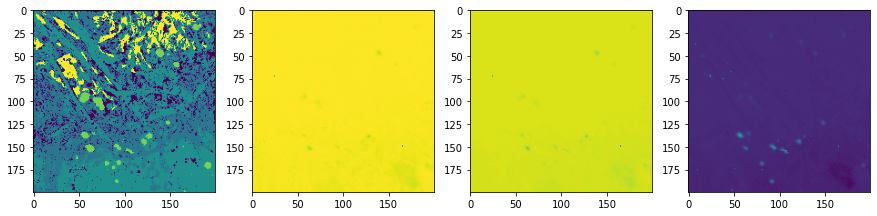

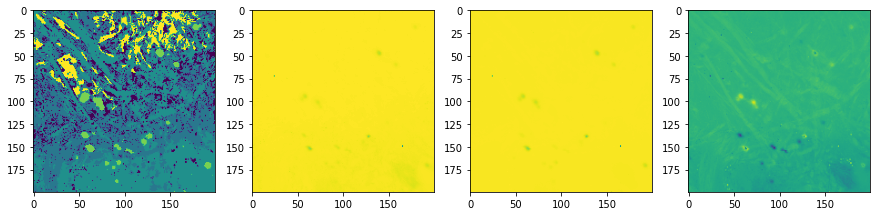

In [19]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,15))
ax1.imshow(data['tissue_t3_1'])
ax2.imshow(V10)
ax3.imshow(V11)
ax4.imshow(V12)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,15))
ax1.imshow(data['tissue_t3_1'])
ax2.imshow(V20)
ax3.imshow(V21)
ax4.imshow(V22)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(15,15))
ax1.imshow(data['tissue_t3_1'])
ax2.imshow(V30)
ax3.imshow(V31)
ax4.imshow(V32)

# Other samples...


In [ ]:
from mpl_toolkits import mplot3d
import scipy.io as scio
import numpy as np 
import matplotlib.pyplot as plt

data7 = scio.loadmat('tissue7_1.mat')
data8 = scio.loadmat('tissue8_1.mat')

t71  = data7['map_t7_1']     # (200, 200, 1024)
t72  = data7['map_t7_2']     # (200, 200, 1024)
t81  = data8['map_t8_1']     # (200, 200, 1024)
t82  = data8['map_t8']       # (200, 400, 1024)

tissues = [t71,t72,t81,t82]

Article talks about band at 784 being significant in identifying cancerous tissue (related to amount of DNA/RNA)

In [ ]:
t71 = t71[:,:,759:809]
t72 = t72[:,:,759:809]
t81 = t81[:,:,759:809]
t82 = t82[:,:,759:809]

In [ ]:
# Construct data matrix
D0 = np.zeros((40000,50))
D1 = np.zeros((40000,50))
D2 = np.zeros((40000,50))
D3 = np.zeros((80000,50))

for i in range(200):
    for j in range(200):
        index = i*200 + j
        D0[index,:] = t71[i,j,:]
        D1[index,:] = t72[i,j,:]
        D2[index,:] = t81[i,j,:]
        
for i in range(200):
    for j in range(400):
        index = i*400 + j
        D3[index,:] = t82[i,j,:]

# SVD

In [ ]:
V0, W0, U0 = np.linalg.svd(D0)

In [ ]:
V1, W1, U1 = np.linalg.svd(D1)

In [ ]:
V2, W2, U2 = np.linalg.svd(D2)

In [ ]:
V3, W3, U3 = np.linalg.svd(D3)

In [ ]:
# Significant V vectors
plt.plot(W0[0:10], color='blue')
plt.plot(W1[0:10], color='red')
plt.plot(W2[0:10], color='green')
plt.plot(W3[0:10], color='orange')

NameError: name 'plt' is not defined

In [ ]:
V_0 = np.zeros((200,200))
V_1 = np.zeros((200,200))
V_2 = np.zeros((200,200))
V_3 = np.zeros((200,400))

for i in range(200):
    for j in range(200):
        index = i*200 + j
        V_0[i,j] = V0[index,0]
        V_1[i,j] = V1[index,0]
        V_2[i,j] = V2[index,0]
        
for i in range(200):
    for j in range(400):
        index = i*400 + j
        V_3[i,j] = V3[index,0]